In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Regressão Linear Simples

In [36]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target 


df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
# dividindo o dataset em dados de treino e dados de teste

X = df[["MedInc"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.shape

(20640, 1)

In [39]:
y.shape

(20640,)

In [40]:
# criando o modelo

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [41]:
# imprimindo os valores de (β₀) e (β₁)

print("Intercepto (β₀):", modelo.intercept_)
print("Coeficiente Angular (β₁):", modelo.coef_[0])

Intercepto (β₀): 0.44459729169078677
Coeficiente Angular (β₁): 0.4193384939381274


In [42]:
# realizando as previsões

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.4589
MAE: 0.6299
MSE: 0.7091
RMSE: 0.8421


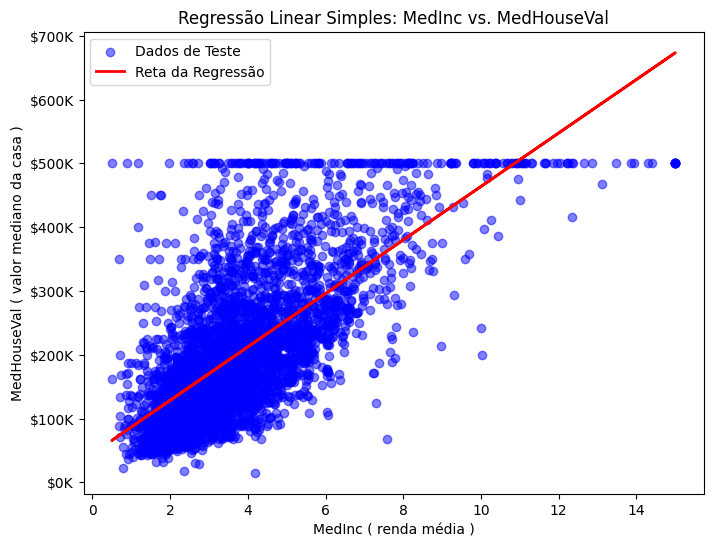

In [46]:
# visualizando a reta
import matplotlib.ticker as mticker

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Dados de Teste")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Reta da Regressão")
plt.xlabel("MedInc ( renda média )")
plt.ylabel("MedHouseVal ( valor mediano da casa )")
plt.title("Regressão Linear Simples: MedInc vs. MedHouseVal")
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x * 100:.0f}K"))

plt.show()

## Regressão Linear Múltipla

In [47]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [48]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [52]:
# escolhendo as variáveis de feature e a variável target

X = df.drop(columns=["target"])
y = df["target"]

In [53]:
X.shape

(20640, 8)

In [54]:
y.shape

(20640,)

In [55]:
# dividindo o dataset em dados de treino e dados de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# criando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# coeficientes do modelo

print(model.intercept_)
coefs = pd.DataFrame({
    'Feature': data.feature_names,
    'Coef': model.coef_
})
print(coefs)

-37.023277706064064
      Feature      Coef
0      MedInc  0.448675
1    HouseAge  0.009724
2    AveRooms -0.123323
3   AveBedrms  0.783145
4  Population -0.000002
5    AveOccup -0.003526
6    Latitude -0.419792
7   Longitude -0.433708


In [58]:
# previsões

y_pred = model.predict(X_test)

In [59]:
# métricas

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5757877060324511
0.5332001304956558
0.555891598695244
0.7455813830127761


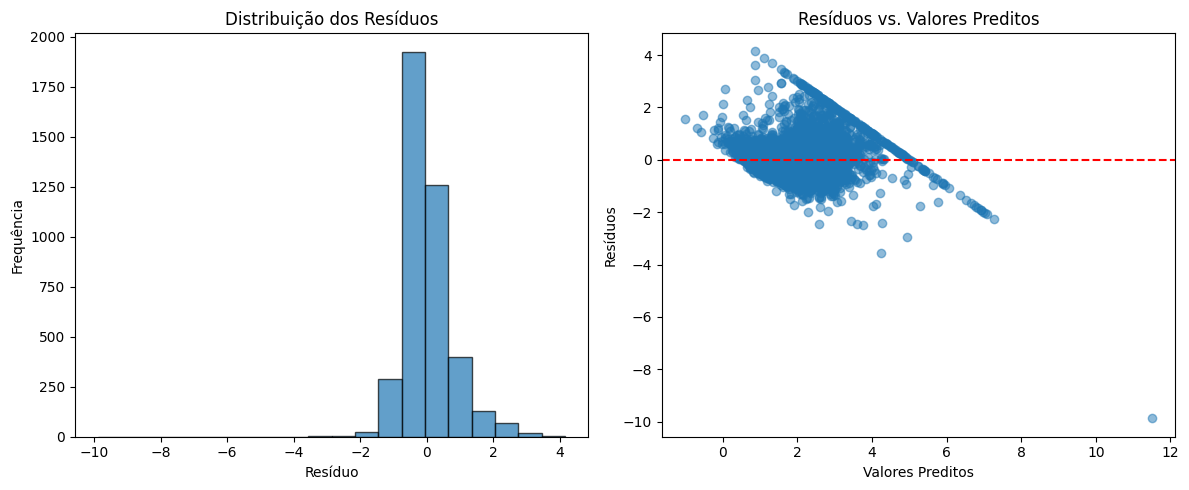

In [ ]:
residuos = y_test - y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuos, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos vs. Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.tight_layout()
plt.show()